In [1]:
#Incomplete, Sample Correlation

# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline


Bad key text.latex.preview in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

In [4]:
# Set the file paths to the CSVs using the Path class from the pathlib library
fed_assets_path = Path("../Resources/FRED corrected dates/total_assets.csv")
sp500_path = Path("../Resources/Yahoo all dates/sp500_data.csv")

In [5]:
# Read the ice cream sales data, set the `date` as the index
fed_df = pd.read_csv(fed_assets_path)
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [5]:
fed_df.dtypes

date             object
total_assets    float64
dtype: object

In [6]:
columns = ['Date', 'WALCL']
fed_df.columns = columns
fed_df.head()

,Date,WALCL
0,2002-12-01,NaN
1,2003-01-01,724718.0
2,2003-02-01,721326.0
3,2003-03-01,723651.0
4,2003-04-01,736926.0


In [7]:
fed_df['Date'] = pd.to_datetime(fed_df['Date'])

In [8]:
fed_df.set_index('Date', inplace=True)
fed_df.head()

,WALCL
Date,
2002-12-01,NaN
2003-01-01,724718.0
2003-02-01,721326.0
2003-03-01,723651.0
2003-04-01,736926.0


In [9]:
sp500_df.index = pd.to_datetime(sp500_df.index)
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


<AxesSubplot:xlabel='Date'>

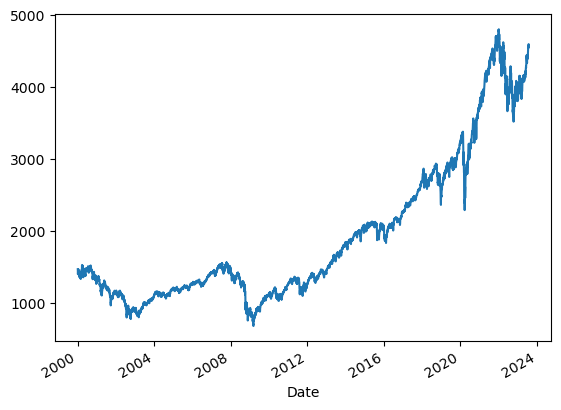

In [10]:
sp500_df['Open'].plot()

<AxesSubplot:xlabel='Date'>

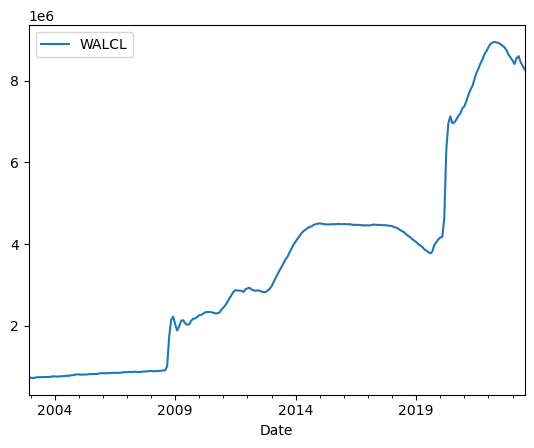

In [11]:
fed_df.plot()

In [10]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([fed_df, sp500_df], axis="columns", join="inner")
combined_df.tail()

,WALCL,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-12-01,8570432.0,4087.139893,4100.509766,4050.870117,4076.570068,4076.570068,4527130000
2023-02-01,8408984.0,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000
2023-03-01,8552199.0,3963.340088,3971.729980,3939.050049,3951.389893,3951.389893,4249480000
2023-05-01,8457176.0,4166.790039,4186.919922,4164.120117,4167.870117,4167.870117,3321370000
2023-06-01,8370156.0,4183.029785,4232.430176,4171.640137,4221.020020,4221.020020,4391860000


In [17]:
combined = combined_df.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])
combined_c = ['Fed_Total_Assets', 'S&P']
combined.columns = combined_c
liqcombined = combined
combined['% Gain Fed'] = combined['Fed_Total_Assets'].pct_change() * 100
combined['% Gain S&P'] = combined['S&P'].pct_change() * 100
combined.tail()

,Fed_Total_Assets,S&P,% Gain Fed,% Gain S&P
Date,,,,
2022-12-01,8570432.0,4087.139893,-0.776107,4.750380
2023-02-01,8408984.0,4070.070068,-1.883779,-0.417647
2023-03-01,8552199.0,3963.340088,1.703119,-2.622313
2023-05-01,8457176.0,4166.790039,-1.111094,5.133295
2023-06-01,8370156.0,4183.029785,-1.028949,0.389742


In [12]:
Fed_Monthly_Return = combined['Fed_Total_Assets'].pct_change()
SP500_Monthly_Return = combined['S&P'].pct_change()
# Calculate the cumulative gain (or loss)
combined['Fed_Cumulative_Gain'] = (1 + Fed_Monthly_Return).cumprod() - 1
combined['S&P_Cumulative_Gain'] = (1 + SP500_Monthly_Return).cumprod() - 1
combined.head()

,Fed_Total_Assets,S&P,% Gain Fed,% Gain S&P,Fed_Cumulative_Gain,S&P_Cumulative_Gain
Date,,,,,,
2003-04-01,736926.0,848.179993,NaN,NaN,NaN,NaN
2003-05-01,738358.0,916.919983,0.194321,8.104411,0.001943,0.081044
2003-07-01,741656.0,974.500000,0.446667,6.279721,0.006419,0.148931
2003-08-01,740217.0,990.309998,-0.194025,1.622370,0.004466,0.167571
2003-10-01,747068.0,995.969971,0.925539,0.571535,0.013763,0.174244


In [13]:
# Normalization formula
combined_norm = (combined - combined.min()) / (combined.max() - combined.min())

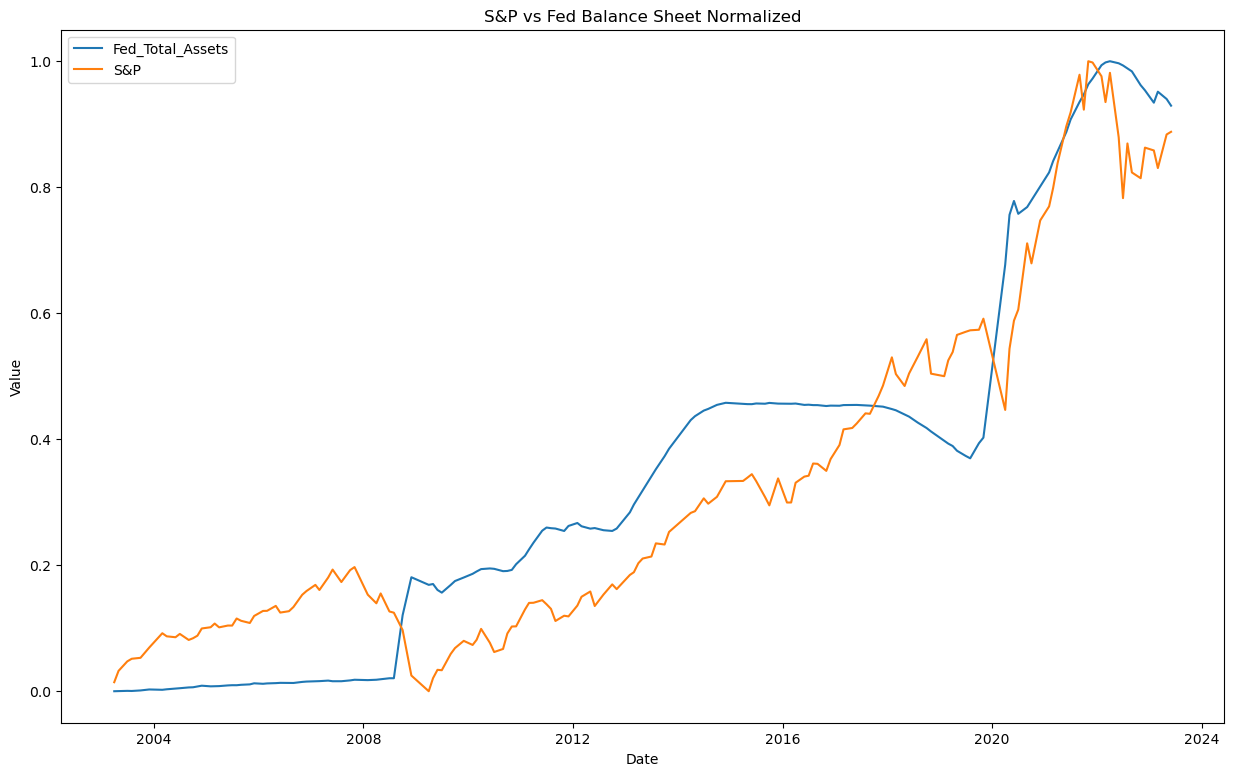

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 9))
# Line plot for Asset1_Price
plt.plot(combined_norm.index, combined_norm['Fed_Total_Assets'], label='Fed_Total_Assets')

# Line plot for Asset2_Price
plt.plot(combined_norm.index, combined_norm['S&P'], label='S&P')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('S&P vs Fed Balance Sheet Normalized')

# Add a legend
plt.legend()

# Show the plot
plt.show()
plt.savefig('S&P vs Fed Balance Sheet Normalized.png', dpi=300)

<AxesSubplot:xlabel='Fed_Cumulative_Gain', ylabel='S&P_Cumulative_Gain'>

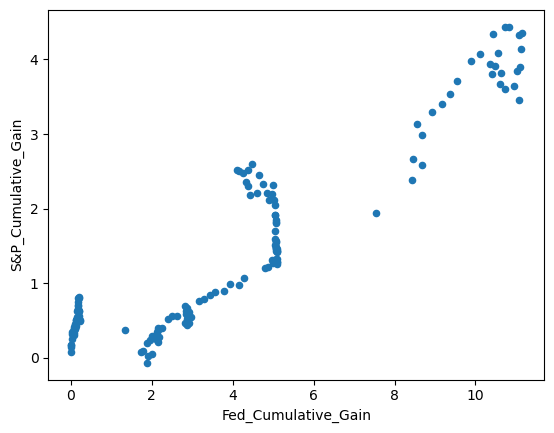

In [29]:
combined.plot(kind='scatter', x='Fed_Cumulative_Gain', y='S&P_Cumulative_Gain')

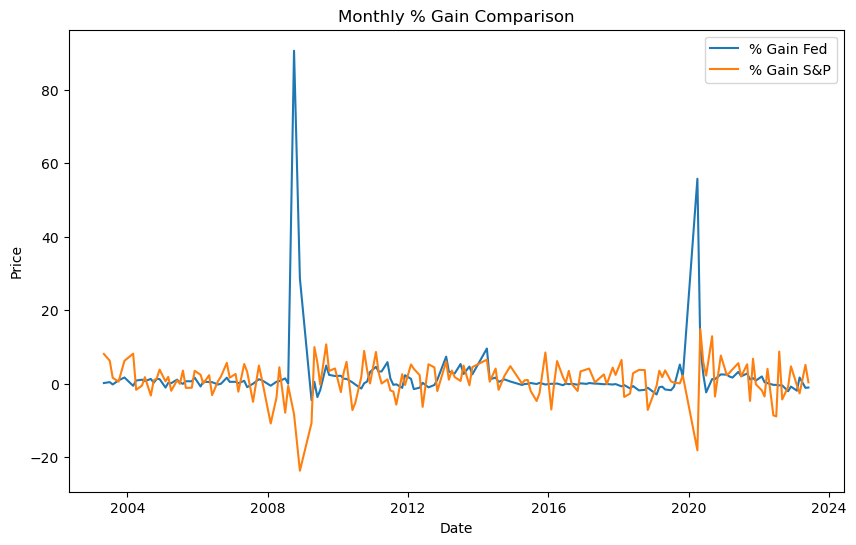

In [25]:

plt.figure(figsize=(10, 6))
# Line plot for Asset1_Price
plt.plot(combined.index, combined['% Gain Fed'], label='% Gain Fed')

# Line plot for Asset2_Price
plt.plot(combined.index, combined['% Gain S&P'], label='% Gain S&P')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly % Gain Comparison')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<AxesSubplot:xlabel='Fed_Total_Assets', ylabel='S&P'>

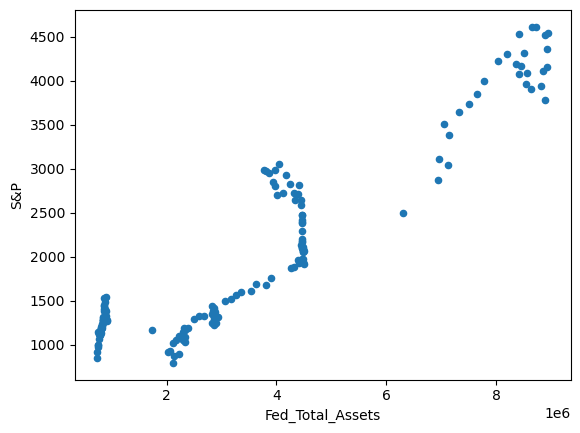

In [16]:
combined.plot(kind='scatter', x='Fed_Total_Assets', y='S&P')

<AxesSubplot:>

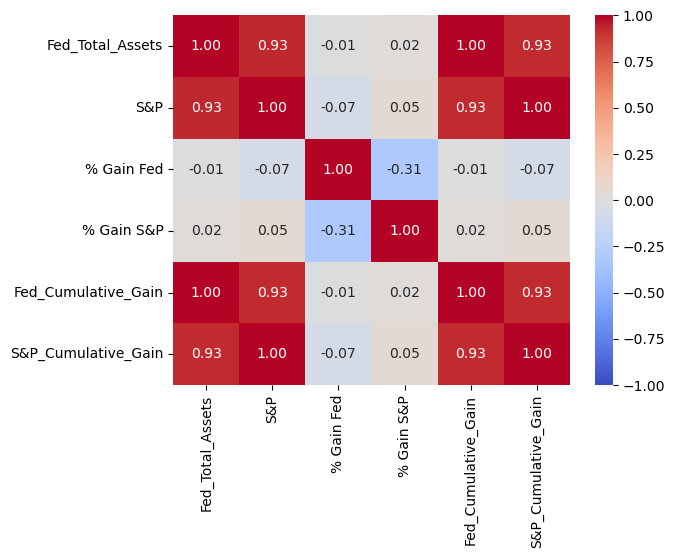

In [30]:
price_correlation = combined.corr()
sns.heatmap(price_correlation, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)

In [19]:
liquidpath = Path("../Resources/FRED corrected dates/corporate_liquidity.csv")
liquid_df = pd.read_csv(liquidpath, parse_dates=True, index_col="date", infer_datetime_format=True)
liq_fed_sp = pd.concat([liquid_df, liqcombined], axis=1, join='inner')
liq_fed_sp = liq_fed_sp.drop(columns={'% Gain Fed', '% Gain S&P'})

<AxesSubplot:>

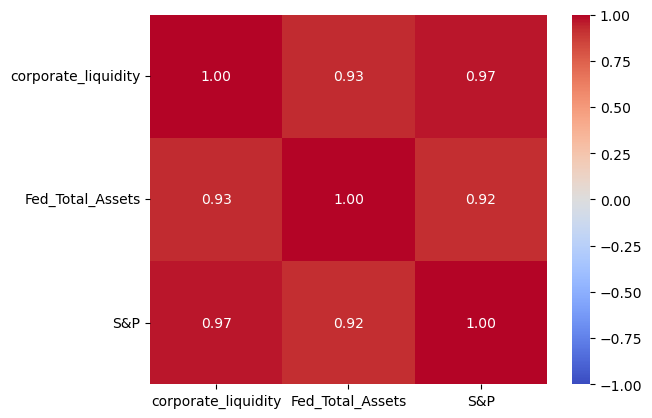

In [21]:
price_correlation = liq_fed_sp.corr()
sns.heatmap(price_correlation, cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)